In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset loaded successfully from: /content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv
After Cleaning
Total Columns: 28
['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1', 'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat', 'lon']
After the initial Data Inspection

First 5 rows of the dataset:
       dr_no               date_rptd                date_occ  time_occ  area    area_name  rpt_dist_no  part_1_2  crm_cd                                        crm_cd_desc                                  mocodes  vict_age vict_sex vict_descent  premis_cd             premis_desc  weapon_used_cd                       weapon_desc status  status_desc  crm_cd_1  crm_cd_2  crm_cd_3  crm_cd_4                                  location cross_street      lat       lon

/tmp/ipython-input-3255364045.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_occ_col] = pd.to_datetime(df[date_occ_col])
/tmp/ipython-input-3255364045.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_rptd_col] = pd.to_datetime(df[date_rptd_col])



Data types after date conversion:
date_occ     datetime64[ns]
date_rptd    datetime64[ns]
dtype: object

 Descriptive Statistics & Missing Values

Summary statistics for Numerical Columns:
              dr_no                      date_rptd                       date_occ      time_occ          area   rpt_dist_no      part_1_2        crm_cd      vict_age     premis_cd  weapon_used_cd      crm_cd_1      crm_cd_2     crm_cd_3   crm_cd_4           lat           lon
count  1.004991e+06                        1004991                        1004991  1.004991e+06  1.004991e+06  1.004991e+06  1.004991e+06  1.004991e+06  1.004991e+06  1.004975e+06   327247.000000  1.004980e+06  69160.000000  2314.000000   64.00000  1.004991e+06  1.004991e+06
mean   2.202215e+08  2022-05-25 22:02:46.977017856  2022-05-13 17:50:37.556754176  1.339900e+03  1.069174e+01  1.115633e+03  1.400348e+00  5.001568e+02  2.891706e+01  3.056201e+02      363.955300  4.999174e+02    958.101258   984.015990  991.21875  3.399821e

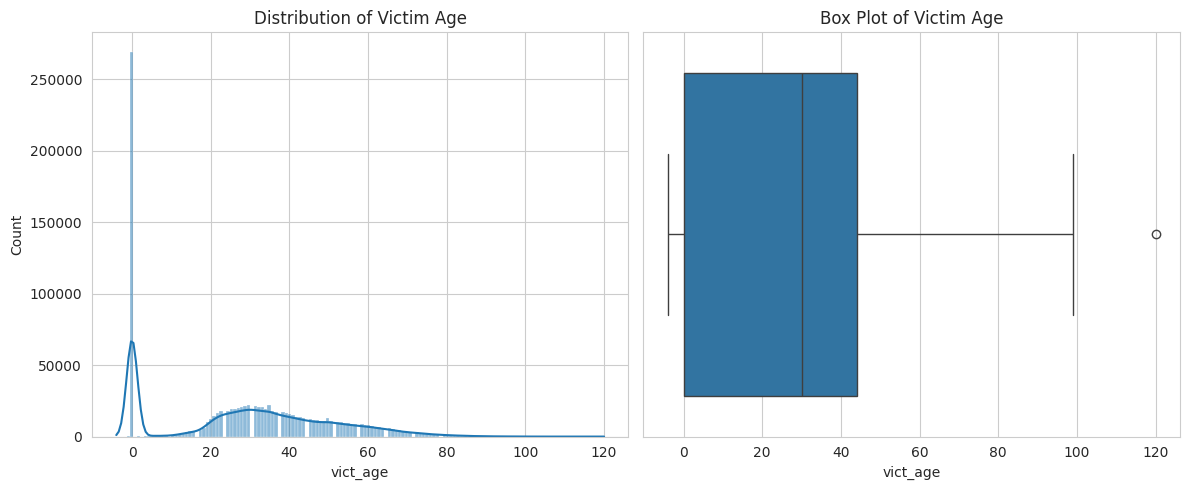

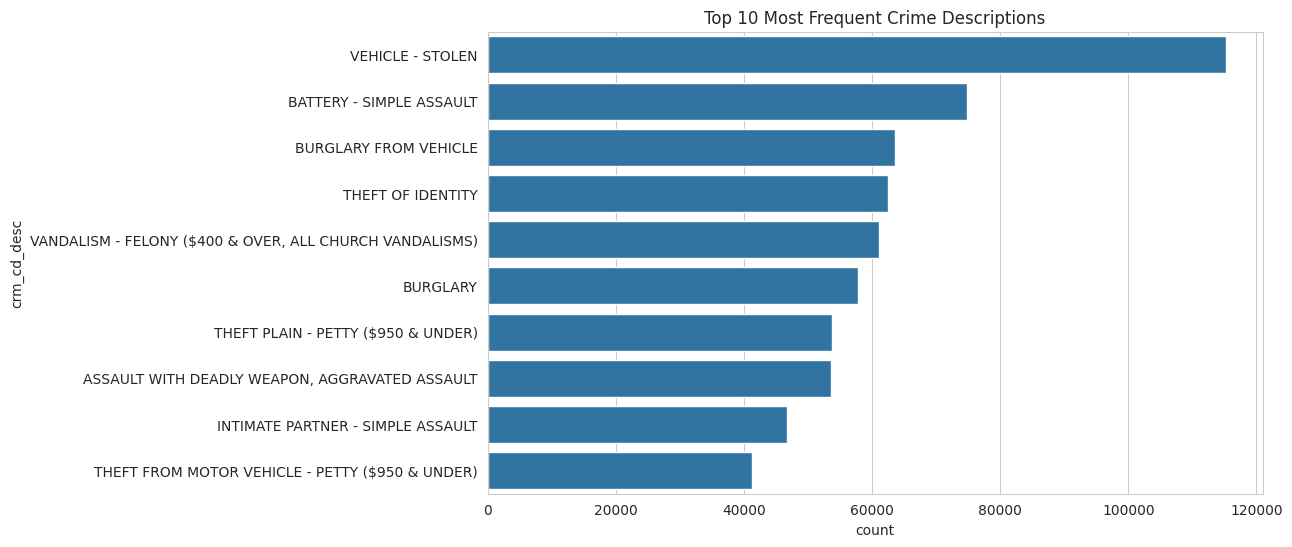


 7. Bivariate Analysis 


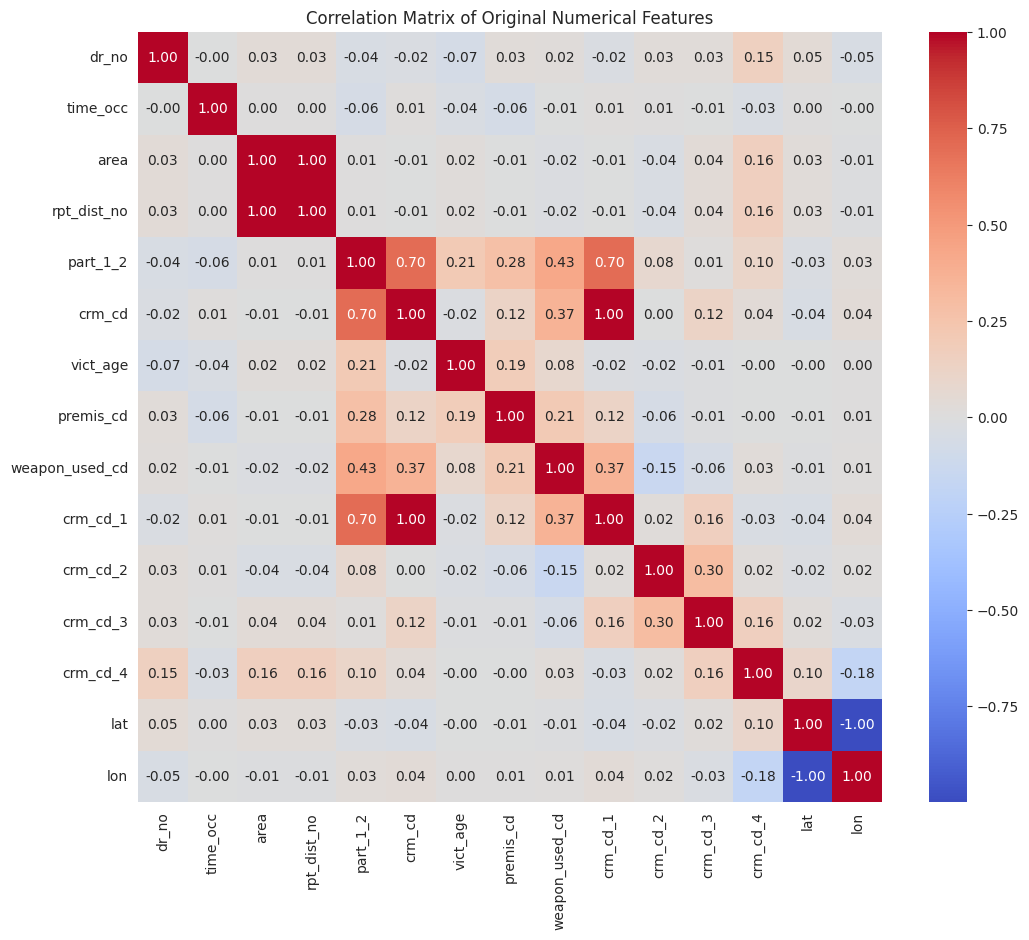


EDA Complete 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load data
file_name = '/content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv'
try:
    df = pd.read_csv(file_name)
    print(f"Dataset loaded successfully from: {file_name}")
except FileNotFoundError:
    print(f"File not found,'{file_name}'")
    exit()

# Column Cleaning
df.columns = df.columns.str.strip().str.lower()
df.columns = df.columns.map(lambda x: re.sub(r'[^a-z0-9_]+', '_', x))

print("After Cleaning")
print(f"Total Columns: {df.shape[1]}")
print(df.columns.tolist())

# Inspecting the data
print("After the initial Data Inspection")
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Extracting- all column names, data types, and non-null counts
print("\nColumn information:")
# Output- before conversion
df.info()

# Data Type Conversion
print("\n Data Type Conversion")

try:
    date_occ_col = [col for col in df.columns if 'date' in col and 'occ' in col][0]
    date_rptd_col = [col for col in df.columns if 'date' in col and ('reported' in col or 'rptd' in col)][0]

except IndexError:
    print("Could not find all required date columns for conversion.")
    exit()

# date ->datetime objects
df[date_occ_col] = pd.to_datetime(df[date_occ_col])
df[date_rptd_col] = pd.to_datetime(df[date_rptd_col])

print("\nData types after date conversion:")
print(df[[date_occ_col, date_rptd_col]].dtypes)


# Stat and Missing value calc
print("\n Descriptive Statistics & Missing Values")

# Summary statistics for Numerical Columns
print("\nSummary statistics for Numerical Columns:")
print(df.describe())

# Summary statistics for Categorical (Object/String) Columns
print("\nSummary statistics for Categorical Columns:")
print(df.describe(include=['object']))

# Check for the count of missing values per column
print("\nMissing Values Count:")
print(df.isnull().sum())

# Univariate Analysis
print("\n Univariate Analysis")

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Distribution of victim age (sample)
if 'vict_age' in numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df['vict_age'], kde=True)
    plt.title('Distribution of Victim Age')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['vict_age'])
    plt.title('Box Plot of Victim Age')

    plt.tight_layout()
    plt.show()


# Top 10 crime descriptions
if 'crm_cd_desc' in categorical_cols:
    plt.figure(figsize=(10, 6))
    top_10_crimes = df['crm_cd_desc'].value_counts().nlargest(10).index
    sns.countplot(y='crm_cd_desc', data=df, order=top_10_crimes)
    plt.title('Top 10 Most Frequent Crime Descriptions')
    plt.show()


# Bivariate Analysis
print("\n 7. Bivariate Analysis ")

# Correlation Heatmap on numerical features
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Original Numerical Features')
    plt.show()


print("\nEDA Complete ")

In [1]:
import pandas as pd
import re
import numpy as np

# Load the Data
file_name = '/content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv'
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"'{file_name}', file not found!")
    exit()

# Standardize column names
df.columns = df.columns.str.strip().str.lower()
df.columns = df.columns.map(lambda x: re.sub(r'[^a-z0-9_]+', '_', x))

# Data type conversions and fetaure engineering
try:
    date_occ_col = [col for col in df.columns if 'date' in col and 'occ' in col][0]
    date_rptd_col = [col for col in df.columns if 'date' in col and ('reported' in col or 'rptd' in col)][0]
    time_occ_col = [col for col in df.columns if 'time' in col and 'occ' in col][0]

except IndexError:
    print("Could not find all required date/time columns after cleaning.")
    exit()

# Convert Date Columns to datetime objects
df[date_occ_col] = pd.to_datetime(df[date_occ_col])
df[date_rptd_col] = pd.to_datetime(df[date_rptd_col])


# Get the final datatype counts
print("\nCount of each datatype across different features:")
print(df.dtypes.value_counts().to_string())

/tmp/ipython-input-3472185226.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_occ_col] = pd.to_datetime(df[date_occ_col])
/tmp/ipython-input-3472185226.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_rptd_col] = pd.to_datetime(df[date_rptd_col])



Count of each datatype across different features:
object            11
float64            8
int64              7
datetime64[ns]     2
